In [1]:
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

## Load data

In [2]:
df = pd.read_csv('data/data_3.csv',index_col=[0],parse_dates=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 70 entries, 1949-01-01 to 2018-01-01
Data columns (total 18 columns):
primary-energy                  69 non-null float64
gdp                             69 non-null float64
population                      69 non-null float64
PPIACO                          70 non-null float64
miles-per-vehicle               68 non-null float64
crude_oil                       69 non-null float64
natural-gas                     64 non-null float64
pri-energy-production           69 non-null float64
Electricity-price               69 non-null float64
coal-price                      63 non-null float64
Energy-export                   69 non-null float64
Energy-import                   69 non-null float64
Heating-degree                  69 non-null float64
Cooling-degree                  69 non-null float64
CO2                             69 non-null float64
renewable                       69 non-null float64
Vehicle-fuel-economy            68 non-null f

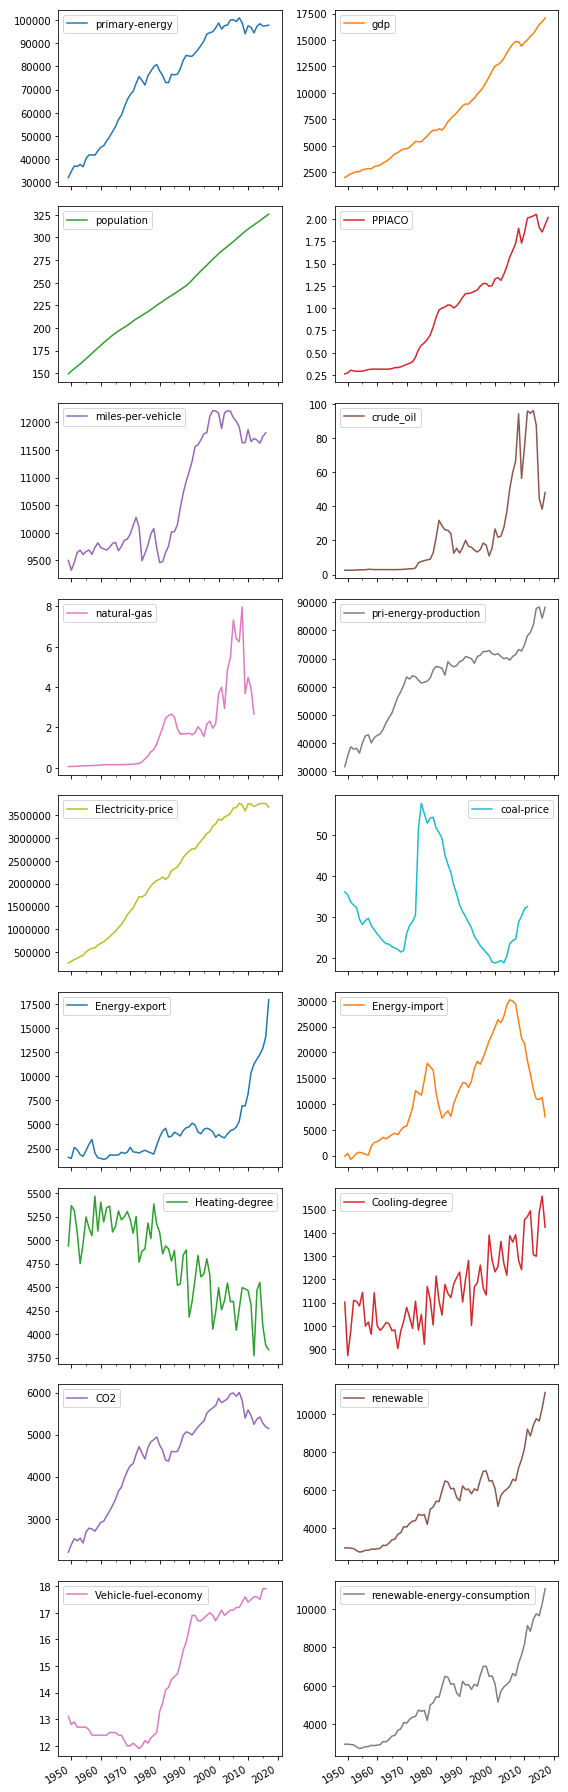

In [3]:
df.plot(subplots=True,figsize=(8,25),layout=(9,2))
plt.tight_layout()
plt.show()

**Data includes primary energy consumption (Y variable) and other 17 features (X)**

In [4]:
df.head()

,primary-energy,gdp,population,PPIACO,miles-per-vehicle,crude_oil,natural-gas,pri-energy-production,Electricity-price,coal-price,Energy-export,Energy-import,Heating-degree,Cooling-degree,CO2,renewable,Vehicle-fuel-economy,renewable-energy-consumption
1949-01-01,31981.503,2008.9,149.2,0.263083,9498.0,2.54,0.06,31722.160,254511.334,36.14,1591.760,-143.602,4938.0,1101.0,2206.691,2973.984,13.1,2973.984
1950-01-01,34615.768,2184.0,152.3,0.273417,9321.0,2.51,0.07,35540.384,291443.326,35.41,1465.322,447.565,5367.0,871.0,2382.046,2977.718,12.8,2977.718
1951-01-01,36974.030,2360.0,154.9,0.304250,9460.0,2.53,0.07,38750.615,330284.583,33.67,2621.545,-729.119,5315.0,974.0,2526.687,2958.464,12.9,2958.464
1952-01-01,36747.825,2456.1,157.6,0.296000,9642.0,2.53,0.08,37916.913,356163.960,32.97,2365.131,-219.147,5085.0,1109.0,2473.374,2940.181,12.7,2940.181
1953-01-01,37664.468,2571.4,160.2,0.291750,9684.0,2.68,0.09,38180.796,396216.896,32.34,1866.013,447.029,4749.0,1105.0,2536.893,2831.460,12.7,2831.460


In [5]:
features = pd.DataFrame(df.columns)

## Pearson correlation coefficient

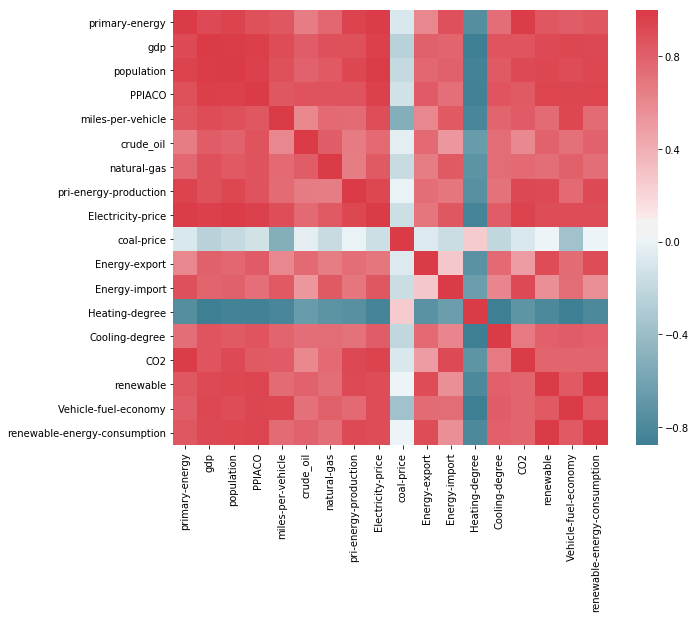

In [6]:
plt.figure(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, 
            yticklabels=corr.columns.values,
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
           square = True)

In [7]:
corr

,primary-energy,gdp,population,PPIACO,miles-per-vehicle,crude_oil,natural-gas,pri-energy-production,Electricity-price,coal-price,Energy-export,Energy-import,Heating-degree,Cooling-degree,CO2,renewable,Vehicle-fuel-economy,renewable-energy-consumption
primary-energy,1.000000,0.914758,0.954598,0.886630,0.849460,0.658458,0.765733,0.953758,0.978544,-0.084788,0.605547,0.877704,-0.764504,0.731045,0.991448,0.848734,0.819877,0.851307
gdp,0.914758,1.000000,0.988122,0.977673,0.908550,0.818538,0.882607,0.884375,0.970624,-0.253422,0.800907,0.778006,-0.870358,0.867215,0.867633,0.918398,0.929065,0.919592
population,0.954598,0.988122,1.000000,0.970274,0.889499,0.791919,0.842130,0.933745,0.988774,-0.190012,0.771714,0.796811,-0.844143,0.835069,0.914224,0.927513,0.906035,0.928984
PPIACO,0.886630,0.977673,0.970274,1.000000,0.849651,0.871704,0.871777,0.874701,0.957602,-0.124356,0.825998,0.724146,-0.854568,0.862889,0.832537,0.942321,0.935366,0.943520
miles-per-vehicle,0.849460,0.908550,0.889499,0.849651,1.000000,0.604330,0.750972,0.746852,0.896308,-0.512333,0.610306,0.839380,-0.823683,0.774986,0.829311,0.748504,0.931192,0.749958
crude_oil,0.658458,0.818538,0.791919,0.871704,0.604330,1.000000,0.819034,0.663218,0.750854,-0.028239,0.762792,0.527832,-0.656221,0.729312,0.601319,0.791574,0.715025,0.791971
natural-gas,0.765733,0.882607,0.842130,0.871777,0.750972,0.819034,1.000000,0.656418,0.836053,-0.179372,0.657544,0.838095,-0.717130,0.737850,0.758011,0.731306,0.799879,0.733475
pri-energy-production,0.953758,0.884375,0.933745,0.874701,0.746852,0.663218,0.656418,1.000000,0.933962,-0.000183,0.730760,0.697274,-0.740917,0.711418,0.921315,0.916087,0.763959,0.917611
Electricity-price,0.978544,0.970624,0.988774,0.957602,0.896308,0.750854,0.836053,0.933962,1.000000,-0.145444,0.698357,0.852843,-0.839059,0.817204,0.952289,0.898623,0.908861,0.900791
coal-price,-0.084788,-0.253422,-0.190012,-0.124356,-0.512333,-0.028239,-0.179372,-0.000183,-0.145444,1.000000,-0.068749,-0.161447,0.252541,-0.207236,-0.081824,0.014269,-0.368218,0.013648


## Split data

In [8]:
x_train = df.iloc[:45,1:]
y_train = df.iloc[:45,0]

x_test = df.iloc[45:,1:]
y_test = df.iloc[45:,0]

In [9]:
x_train.shape

(45, 17)

In [10]:
x_test.shape

(25, 17)

## Stationary test

In [11]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):           
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [12]:
features = x_train.columns
for i,j in enumerate(features):
    print(str(i) + '. Series of ' + j)
    test_stationarity(x_train[j])
    print('')

0. Series of gdp
Results of Dickey-Fuller Test:
Test Statistic                  2.336359
p-value                         0.998977
#Lags Used                      0.000000
Number of Observations Used    44.000000
Critical Value (1%)            -3.588573
Critical Value (5%)            -2.929886
Critical Value (10%)           -2.603185
dtype: float64

1. Series of population
Results of Dickey-Fuller Test:
Test Statistic                  0.131711
p-value                         0.968161
#Lags Used                      2.000000
Number of Observations Used    42.000000
Critical Value (1%)            -3.596636
Critical Value (5%)            -2.933297
Critical Value (10%)           -2.604991
dtype: float64

2. Series of PPIACO
Results of Dickey-Fuller Test:
Test Statistic                 -0.065985
p-value                         0.952723
#Lags Used                      3.000000
Number of Observations Used    41.000000
Critical Value (1%)            -3.600983
Critical Value (5%)            -2.9

**All features are non-stationary.**

In [13]:
# make a differencing
x_train_1 = x_train.diff().dropna()
x_train_1.head()

,gdp,population,PPIACO,miles-per-vehicle,crude_oil,natural-gas,pri-energy-production,Electricity-price,coal-price,Energy-export,Energy-import,Heating-degree,Cooling-degree,CO2,renewable,Vehicle-fuel-economy,renewable-energy-consumption
1950-01-01,175.1,3.1,0.010333,-177.0,-0.03,0.01,3818.224,36931.992,-0.73,-126.438,591.167,429.0,-230.0,175.355,3.734,-0.3,3.734
1951-01-01,176.0,2.6,0.030833,139.0,0.02,0.00,3210.231,38841.257,-1.74,1156.223,-1176.684,-52.0,103.0,144.641,-19.254,0.1,-19.254
1952-01-01,96.1,2.7,-0.008250,182.0,0.00,0.01,-833.702,25879.377,-0.70,-256.414,509.972,-230.0,135.0,-53.313,-18.283,-0.2,-18.283
1953-01-01,115.3,2.6,-0.004250,42.0,0.15,0.01,263.883,40052.936,-0.63,-499.118,666.176,-336.0,-4.0,63.519,-108.721,0.0,-108.721
1954-01-01,-14.5,2.8,0.000833,-79.0,0.10,0.01,-1662.366,27946.896,-2.87,-169.712,204.546,215.0,-20.0,-114.640,-77.361,0.0,-77.361


In [14]:
for i,j in enumerate(features):
    print(str(i) + '. Series of ' + j)
    test_stationarity(x_train_1[j])
    print('')

0. Series of gdp
Results of Dickey-Fuller Test:
Test Statistic                 -4.934407
p-value                         0.000030
#Lags Used                      0.000000
Number of Observations Used    43.000000
Critical Value (1%)            -3.592504
Critical Value (5%)            -2.931550
Critical Value (10%)           -2.604066
dtype: float64

1. Series of population
Results of Dickey-Fuller Test:
Test Statistic                 -1.484537
p-value                         0.541146
#Lags Used                      1.000000
Number of Observations Used    42.000000
Critical Value (1%)            -3.596636
Critical Value (5%)            -2.933297
Critical Value (10%)           -2.604991
dtype: float64

2. Series of PPIACO
Results of Dickey-Fuller Test:
Test Statistic                 -2.368254
p-value                         0.150898
#Lags Used                      2.000000
Number of Observations Used    41.000000
Critical Value (1%)            -3.600983
Critical Value (5%)            -2.9

Some features are not stationary after make a difference

### Make other transformations for non-stationary time series

In [15]:
test_stationarity(x_train['population'].apply(np.log))

Results of Dickey-Fuller Test:
Test Statistic                 -0.509188
p-value                         0.890211
#Lags Used                      2.000000
Number of Observations Used    42.000000
Critical Value (1%)            -3.596636
Critical Value (5%)            -2.933297
Critical Value (10%)           -2.604991
dtype: float64


In [16]:
test_stationarity(x_train['population'].apply(np.sqrt))

Results of Dickey-Fuller Test:
Test Statistic                 -0.317869
p-value                         0.922935
#Lags Used                      2.000000
Number of Observations Used    42.000000
Critical Value (1%)            -3.596636
Critical Value (5%)            -2.933297
Critical Value (10%)           -2.604991
dtype: float64


In [17]:
# cube root
test_stationarity(x_train['population'].apply(np.cbrt).diff().dropna())

Results of Dickey-Fuller Test:
Test Statistic                 -1.418577
p-value                         0.573339
#Lags Used                      1.000000
Number of Observations Used    42.000000
Critical Value (1%)            -3.596636
Critical Value (5%)            -2.933297
Critical Value (10%)           -2.604991
dtype: float64


In [18]:
test_stationarity(x_train['population'].apply(np.log).apply(np.sqrt))

Results of Dickey-Fuller Test:
Test Statistic                 -0.523809
p-value                         0.887286
#Lags Used                      2.000000
Number of Observations Used    42.000000
Critical Value (1%)            -3.596636
Critical Value (5%)            -2.933297
Critical Value (10%)           -2.604991
dtype: float64


In [19]:
test_stationarity(x_train['population'].apply(np.log).diff().dropna())

Results of Dickey-Fuller Test:
Test Statistic                 -1.430866
p-value                         0.567393
#Lags Used                      1.000000
Number of Observations Used    42.000000
Critical Value (1%)            -3.596636
Critical Value (5%)            -2.933297
Critical Value (10%)           -2.604991
dtype: float64


In [20]:
test_stationarity(x_train['population'].diff().dropna())

Results of Dickey-Fuller Test:
Test Statistic                 -1.484537
p-value                         0.541146
#Lags Used                      1.000000
Number of Observations Used    42.000000
Critical Value (1%)            -3.596636
Critical Value (5%)            -2.933297
Critical Value (10%)           -2.604991
dtype: float64


In [21]:
test_stationarity(x_train['population'].diff().dropna().apply(np.log))

Results of Dickey-Fuller Test:
Test Statistic                 -1.593123
p-value                         0.487047
#Lags Used                      1.000000
Number of Observations Used    42.000000
Critical Value (1%)            -3.596636
Critical Value (5%)            -2.933297
Critical Value (10%)           -2.604991
dtype: float64


In [22]:
test_stationarity(x_train['PPIACO'].apply(np.log))

Results of Dickey-Fuller Test:
Test Statistic                 -0.643786
p-value                         0.860778
#Lags Used                      3.000000
Number of Observations Used    41.000000
Critical Value (1%)            -3.600983
Critical Value (5%)            -2.935135
Critical Value (10%)           -2.605963
dtype: float64


In [23]:
test_stationarity(x_train['PPIACO'].apply(np.log).diff().dropna())

Results of Dickey-Fuller Test:
Test Statistic                 -2.411738
p-value                         0.138451
#Lags Used                      2.000000
Number of Observations Used    41.000000
Critical Value (1%)            -3.600983
Critical Value (5%)            -2.935135
Critical Value (10%)           -2.605963
dtype: float64


In [24]:
test_stationarity(x_train['PPIACO'].apply(np.sqrt))

Results of Dickey-Fuller Test:
Test Statistic                 -0.357972
p-value                         0.916883
#Lags Used                      3.000000
Number of Observations Used    41.000000
Critical Value (1%)            -3.600983
Critical Value (5%)            -2.935135
Critical Value (10%)           -2.605963
dtype: float64


In [25]:
test_stationarity(x_train['PPIACO'].diff().dropna())

Results of Dickey-Fuller Test:
Test Statistic                 -2.368254
p-value                         0.150898
#Lags Used                      2.000000
Number of Observations Used    41.000000
Critical Value (1%)            -3.600983
Critical Value (5%)            -2.935135
Critical Value (10%)           -2.605963
dtype: float64


In [26]:
test_stationarity(x_train['crude_oil'].apply(np.log))

Results of Dickey-Fuller Test:
Test Statistic                 -0.711940
p-value                         0.843633
#Lags Used                      0.000000
Number of Observations Used    44.000000
Critical Value (1%)            -3.588573
Critical Value (5%)            -2.929886
Critical Value (10%)           -2.603185
dtype: float64


In [27]:
test_stationarity(x_train['crude_oil'].diff(2).dropna())

Results of Dickey-Fuller Test:
Test Statistic                 -3.748255
p-value                         0.003483
#Lags Used                      3.000000
Number of Observations Used    39.000000
Critical Value (1%)            -3.610400
Critical Value (5%)            -2.939109
Critical Value (10%)           -2.608063
dtype: float64


In [28]:
test_stationarity(x_train['Electricity-price'].diff().dropna())

Results of Dickey-Fuller Test:
Test Statistic                 -4.834811
p-value                         0.000047
#Lags Used                      1.000000
Number of Observations Used    42.000000
Critical Value (1%)            -3.596636
Critical Value (5%)            -2.933297
Critical Value (10%)           -2.604991
dtype: float64


In [29]:
test_stationarity(x_train['Electricity-price'].apply(np.log))

Results of Dickey-Fuller Test:
Test Statistic                -7.319581e+00
p-value                        1.203989e-10
#Lags Used                     0.000000e+00
Number of Observations Used    4.400000e+01
Critical Value (1%)           -3.588573e+00
Critical Value (5%)           -2.929886e+00
Critical Value (10%)          -2.603185e+00
dtype: float64


In [30]:
test_stationarity(x_train['renewable'].diff(4).dropna())

Results of Dickey-Fuller Test:
Test Statistic                 -2.544064
p-value                         0.105118
#Lags Used                      0.000000
Number of Observations Used    40.000000
Critical Value (1%)            -3.605565
Critical Value (5%)            -2.937069
Critical Value (10%)           -2.606986
dtype: float64


In [31]:
test_stationarity(x_train['renewable'].apply(np.log).diff().dropna())

Results of Dickey-Fuller Test:
Test Statistic                -7.574740e+00
p-value                        2.780849e-11
#Lags Used                     0.000000e+00
Number of Observations Used    4.300000e+01
Critical Value (1%)           -3.592504e+00
Critical Value (5%)           -2.931550e+00
Critical Value (10%)          -2.604066e+00
dtype: float64


In [32]:
test_stationarity(x_train['renewable-energy-consumption'].diff(2).dropna())

Results of Dickey-Fuller Test:
Test Statistic                 -4.898403
p-value                         0.000035
#Lags Used                      1.000000
Number of Observations Used    41.000000
Critical Value (1%)            -3.600983
Critical Value (5%)            -2.935135
Critical Value (10%)           -2.605963
dtype: float64


In [33]:
test_stationarity(x_train['renewable-energy-consumption'].apply(np.log).diff().dropna())

Results of Dickey-Fuller Test:
Test Statistic                -7.574650e+00
p-value                        2.782292e-11
#Lags Used                     0.000000e+00
Number of Observations Used    4.300000e+01
Critical Value (1%)           -3.592504e+00
Critical Value (5%)           -2.931550e+00
Critical Value (10%)          -2.604066e+00
dtype: float64


---

In [34]:
test_stationarity(x_train['Vehicle-fuel-economy'].diff(2).dropna())

Results of Dickey-Fuller Test:
Test Statistic                 -2.006835
p-value                         0.283584
#Lags Used                      3.000000
Number of Observations Used    39.000000
Critical Value (1%)            -3.610400
Critical Value (5%)            -2.939109
Critical Value (10%)           -2.608063
dtype: float64


In [35]:
test_stationarity(x_train['Vehicle-fuel-economy'].apply(np.log).diff(3).dropna())

Results of Dickey-Fuller Test:
Test Statistic                 -1.434517
p-value                         0.565621
#Lags Used                      3.000000
Number of Observations Used    38.000000
Critical Value (1%)            -3.615509
Critical Value (5%)            -2.941262
Critical Value (10%)           -2.609200
dtype: float64


In [36]:
test_stationarity(x_train['Vehicle-fuel-economy'].apply(np.sqrt).diff().dropna())

Results of Dickey-Fuller Test:
Test Statistic                 -4.030625
p-value                         0.001258
#Lags Used                      0.000000
Number of Observations Used    43.000000
Critical Value (1%)            -3.592504
Critical Value (5%)            -2.931550
Critical Value (10%)           -2.604066
dtype: float64


It seems to be that features **['population'] and ['PPIACO']** can not transformed into stationary series.